<a href="https://colab.research.google.com/github/irpekek/image-processing-pada-python/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ENV**

In [194]:
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

**Membaca gambar dan menampilkannya**

In [227]:
def cv_imshow(img):
  plt.figure(figsize = (15, 15))
  plt.imshow(img)
  plt.xticks([]), plt.yticks([])
  plt.show()

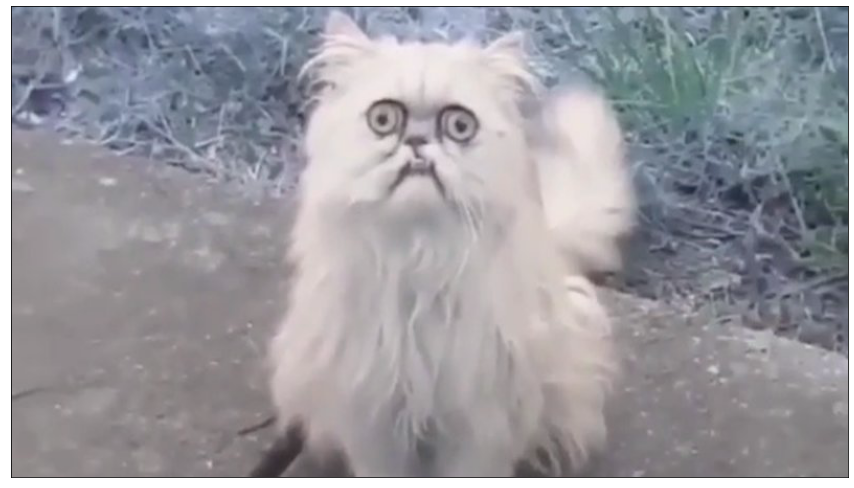

In [228]:
url = "https://i.kym-cdn.com/entries/icons/mobile/000/027/723/Screen_Shot_2018-11-27_at_11.00.05_AM.jpg"
myImage = io.imread(url)
cv_imshow(cv.cvtColor(myImage, cv.COLOR_BGR2RGB))

**Menampilkan citra warna dalam histogram**

<function matplotlib.pyplot.show>

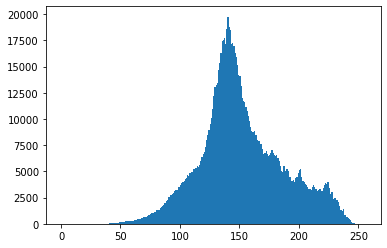

In [197]:
plt.hist(myImage.ravel(), bins = 256, range = [0, 256])
plt.show

<function matplotlib.pyplot.show>

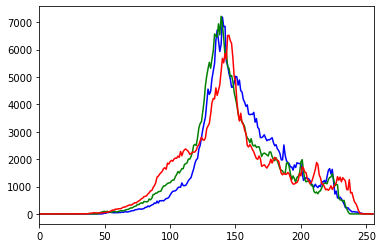

In [198]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
  histr = cv.calcHist([myImage], [i], None, [256], [0, 256])
  plt.plot(histr, color = col)
  plt.xlim([0, 256])
plt.show

**Menampilkan citra warna dan histogram pada gambar grayscale**

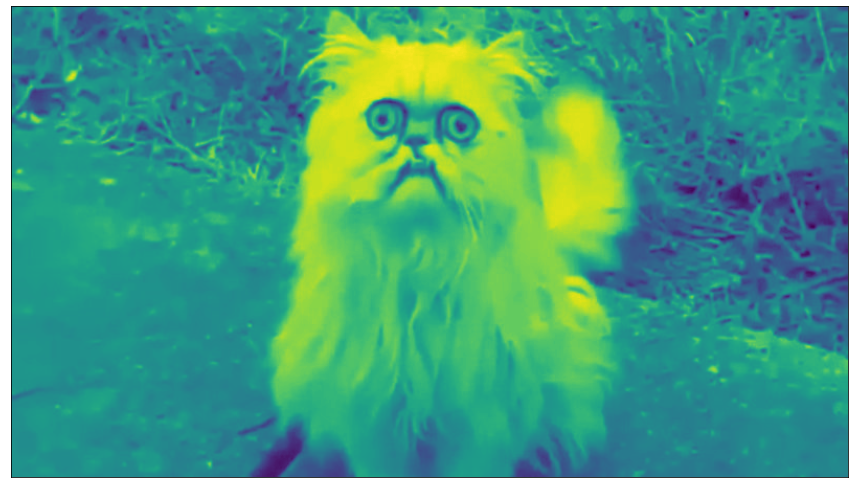

In [199]:
gray_image = cv.cvtColor(myImage, cv.COLOR_BGR2GRAY)
cv_imshow(gray_image)

Terjadi penurunan citra warna pada saat gambar diubah ke dalam grayscale

<function matplotlib.pyplot.show>

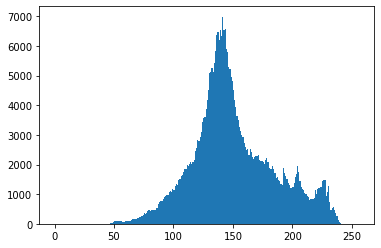

In [200]:
plt.hist(gray_image.ravel(), bins = 256, range = [0, 256])
plt.show

**Menampilkan kontur dalam gambar**

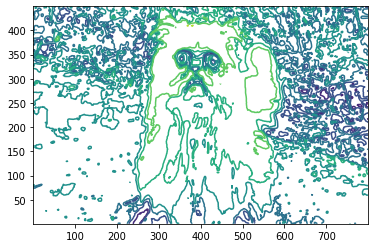

In [201]:
plt.contour(gray_image, origin = "image")

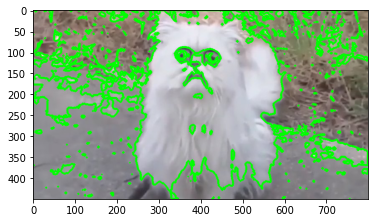

In [202]:
ret, thresh = cv.threshold(gray_image, 150, 225, 0)
contours, hieracrchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(myImage, contours, -1, (0, 255, 0), 3)
plt.imshow(myImage)

**Grayscale Transformation**

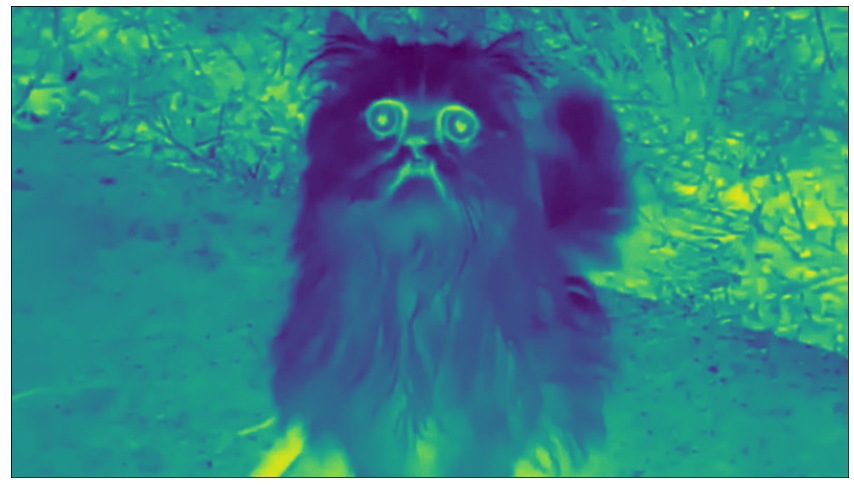

In [217]:
myGrayImgTrans2 = 255 - gray_image
cv_imshow(myGrayImgTrans2)

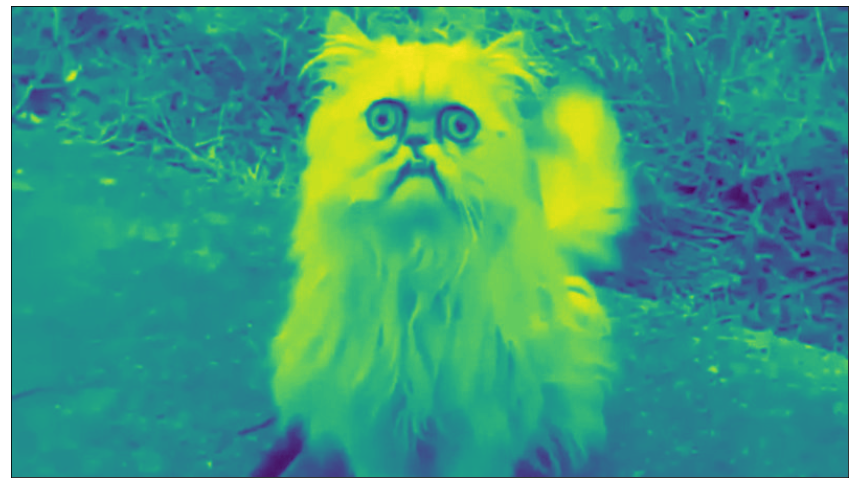

In [218]:
myGrayImgTrans3 = (100.0/255)*gray_image + 100
cv_imshow(myGrayImgTrans3)

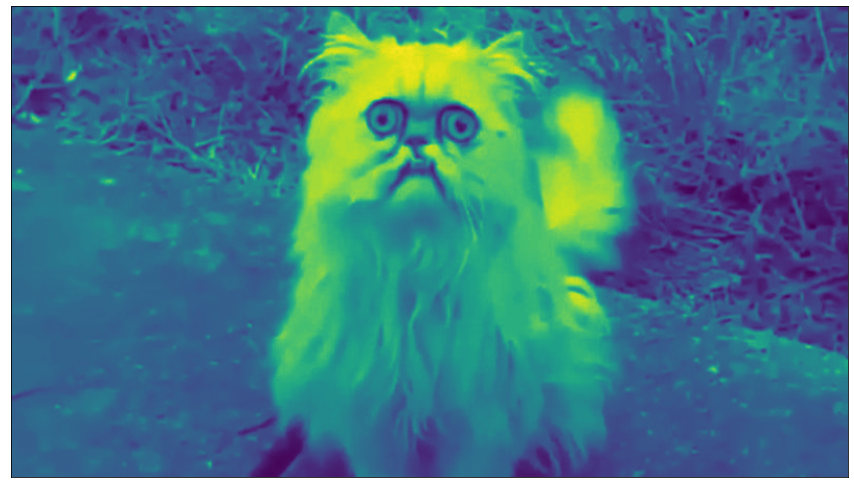

In [219]:
myGrayImgTrans4 = 255.0*(gray_image/255.0)**2
cv_imshow(myGrayImgTrans4)

**Histogram Equalization**

Bagian ini mendemonstrasikan pemerataan histogram pada gambar gelap. Transformasi ini meratakan histogram tingkat abu-abu sehingga semua intensitas menjadi seumum mungkin. Fungsi transformasi adalah fungsi distribusi kumulatif (cdf) dari nilai piksel pada citra (dinormalisasi untuk memetakan rentang nilai piksel ke rentang yang diinginkan). Contoh ini menggunakan gambar 4 (myGrayImgTrans4).

In [222]:
def histeq(im, nbr_bins = 256):
  """ Persamaan histogram dari citra grayscale.  """
  # dapatkan histogram gambar
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # fungsi distribusi kumulatif
  cdf = imhist.max()*cdf/cdf.max()  #normalisasi
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

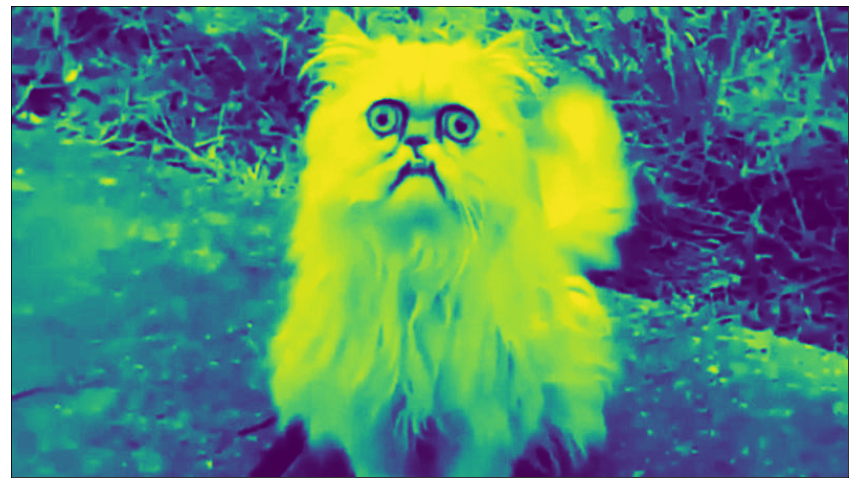

In [223]:
myGrayImgTrans5 = histeq(myGrayImgTrans4)
cv_imshow(myGrayImgTrans5)

Perbandingan histogram antara gambar 4 dan gambar 5

<function matplotlib.pyplot.show>

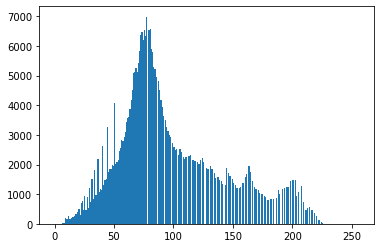

In [224]:
plt.hist(myGrayImgTrans4.ravel(), bins = 256, range = [0, 256])
plt.show

<function matplotlib.pyplot.show>

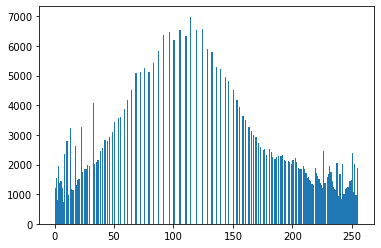

In [225]:
plt.hist(myGrayImgTrans5.ravel(), bins = 256, range = [0, 256])
plt.show

**Transformasi Fourier dari Gambar Abu-abu**

Transformasi fourier digunakan untuk mencari domain frekuensi gambar. Anda dapat menganggap gambar sebagai sinyal yang diambil sampelnya dalam dua arah. Jadi mengambil transformasi fourier di kedua arah X dan Y memberi Anda representasi frekuensi gambar. Untuk sinyal sinusoidal, jika amplitudo berubah sangat cepat dalam waktu singkat, dapat dikatakan itu adalah sinyal frekuensi tinggi. Jika bervariasi perlahan, itu adalah sinyal frekuensi rendah. Tepi dan noise adalah konten frekuensi tinggi dalam gambar karena berubah secara drastis dalam gambar.

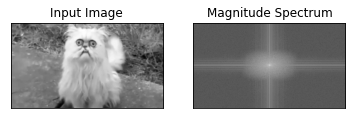

In [233]:
# Buramkan gambar grayscale dengan filter Guassian dengan ukuran kernel 10
imBlur = cv.blur(gray_image,(5,5))
# Ubah gambar menjadi domain frekuensi
f = np.fft.fft2(imBlur)
# Bawa komponen frekuensi-nol ke tengah
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

**Menemukan Tepi dengan Highpass Filtering di FFT**

Bagian ini mendemonstrasikan melakukan high pass filter untuk menghilangkan komponen frekuensi rendah, sehingga menghasilkan gambar yang tajam yang berisi tepinya.

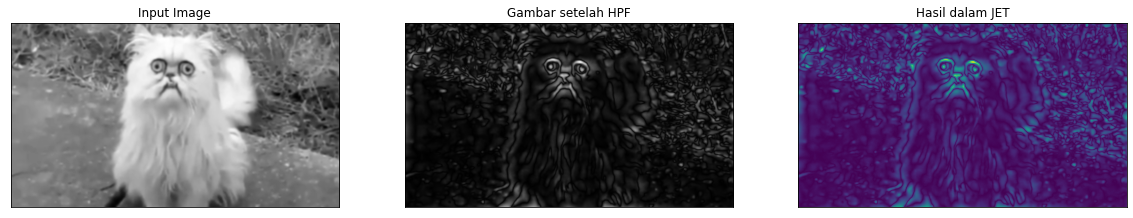

In [234]:
rows, cols = imBlur.shape
crow, ccol = round(rows/2), round(cols/2)
# hilangkan frekuensi rendah dengan ukuran persegi panjang 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Gambar setelah HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Hasil dalam JET'), plt.xticks([]), plt.yticks([])
plt.show()